In [14]:
#Descarga de Indices
import pandas_datareader.data as web
indices_tickers =["FTSEMIB.MI","^IBEX","^GSPC","^DJI","^IXIC","^FTSE","^N225","^KS11","XIU.TO","^HSI","399106.SZ","^MXX"]

def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

indices_data = get_adj_closes(indices_tickers,start_date="2019-12-01",end_date="2020-03-30")

In [15]:
indices_data

Symbols,^IBEX,^GSPC,^DJI,^IXIC,^N225,^KS11,XIU.TO,^HSI,399106.SZ,^MXX,FTSEMIB.MI,^FTSE
Date,,,,,,,,,,,,
2019-12-02,9156.299805,3113.870117,27783.039062,8567.990234,23529.500000,2091.919922,25.315754,26444.720703,NaN,42544.140625,NaN,NaN
2019-12-03,9135.700195,3093.199951,27502.810547,8520.639648,23379.810547,2084.070068,25.166838,26391.300781,NaN,42294.519531,NaN,NaN
2019-12-04,9270.799805,3112.760010,27649.779297,8566.669922,23135.230469,2068.889893,25.156910,26062.560547,NaN,42191.921875,NaN,NaN
2019-12-05,9243.400391,3117.429932,27677.789062,8570.700195,23300.089844,2060.739990,25.047705,26217.039062,NaN,42216.031250,NaN,NaN
2019-12-06,9382.700195,3145.909912,28015.060547,8656.530273,23354.400391,2081.850098,25.305826,26498.369141,NaN,41938.691406,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,6942.399902,2475.560059,21200.550781,7384.299805,19546.630859,1704.760010,20.100000,23527.189453,NaN,35536.699219,NaN,NaN
2020-03-26,7033.200195,2630.070068,22552.169922,7797.540039,18664.599609,1686.239990,20.520000,23352.339844,NaN,35706.570312,NaN,NaN
2020-03-27,6777.899902,2541.469971,21636.779297,7502.379883,19389.429688,1717.729980,19.440001,23484.279297,NaN,33799.488281,NaN,NaN


In [ ]:
#TRABJA DE AQUI PA BAJO NOE

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [10]:
overdoses = pd.read_excel('C:/Users/1295779/Desktop/ITESO/6to/Simulacion de procesos financieros/Proyecto_SIMFIN/overdose_data_1999-2015.xls',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [41]:
%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

<IPython.core.display.Javascript object>


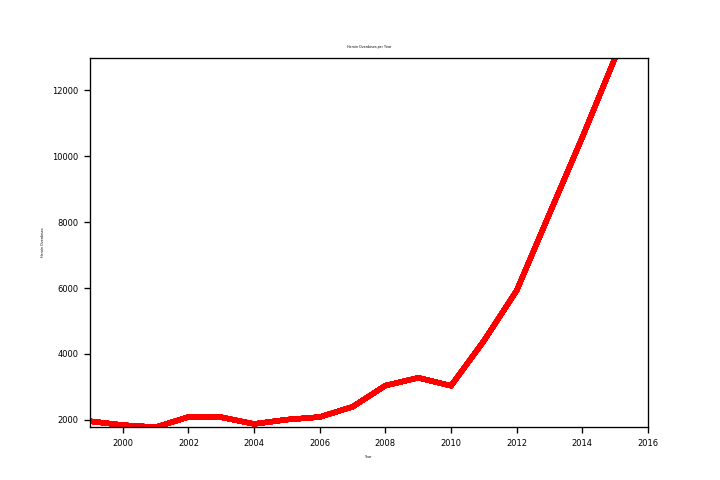

Text(0.5, 1.0, 'Heroin Overdoses per Year')

In [56]:
fig = plt.figure(figsize=(6,4))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=2)
plt.ylabel(title,fontsize=2)
plt.title('Heroin Overdoses per Year',fontsize=2)

In [50]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=7)
    plt.setp(p.lines,linewidth=3)

In [57]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=40, repeat=True)
plt.show()